In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from ma3 import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [14]:
df_dict = {}
# candidate = ['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
candidate = ['ADA','ETC','BTC','ETH','BCH','AAVE','AVAX','MATIC','XLM','MKR','APT','EGLD','GRT','ALGO']
for coin in candidate:
    df_dict[coin] = get_data(coin)

In [15]:
df_dict['SOL'] = get_data('SOL')

Start                               2022-01-01 00:00:00
End                                 2023-11-07 00:00:00
Period                                675 days 01:00:00
Start Value                                     10000.0
Min Value                                     9997.0009
Max Value                                  37620.655012
End Value                                  36010.514118
Total Return [%]                             260.105141
Benchmark Return [%]                         -75.533643
Total Time Exposure [%]                       29.146349
Max Gross Exposure [%]                            100.0
Max Drawdown [%]                              16.283105
Max Drawdown Duration                 121 days 15:00:00
Total Orders                                        160
Total Fees Paid                              493.800038
Total Trades                                         82
Win Rate [%]                                  42.682927
Best Trade [%]                                46

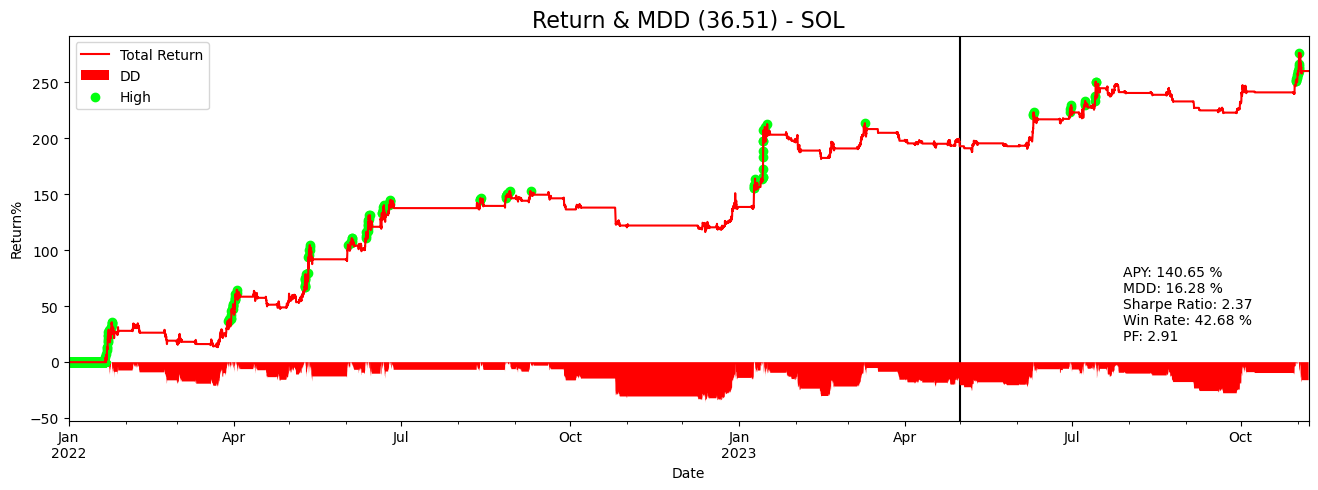

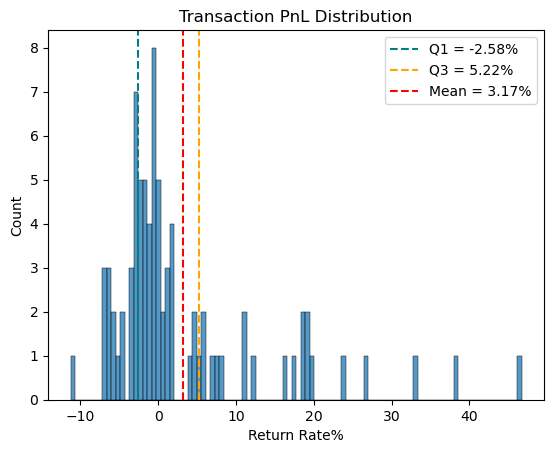

In [24]:
start = '2022-01-01'
sep = ''
end = ''

# params = {'short_window_l': 20, 'middle_window_l': 58, 'long_window_l': 120, 'short_window_s': 28, 'middle_window_s': 62, 'long_window_s': 120, 'upper_bound': 90}

params = {"short_window_l": 24.0,
        "middle_window_l": 56.0,
        "long_window_l": 140.0,
        "short_window_s": 24.0,
        "middle_window_s": 64.0,
        "long_window_s": 132.0}

side = 'both'
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'SOL'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

<AxesSubplot:xlabel='Entry Index'>

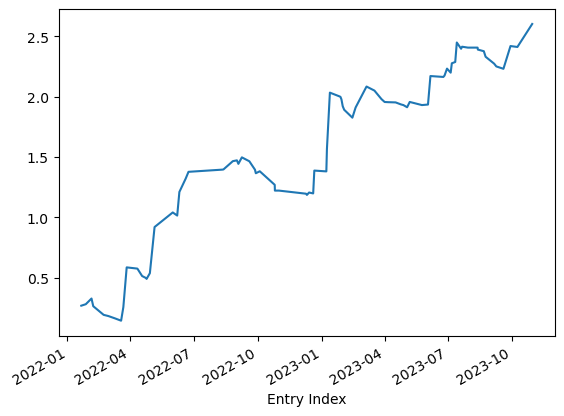

In [25]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

======================= SOL LONG Optimize Test =======================
Optimization trails: 2352


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Pl

Optimization time: 61.37 sec
---------- SOL LONG ----------
{'short_window_l': 20, 'middle_window_l': 4, 'long_window_l': 16, 'short_window_s': 20, 'middle_window_s': 50, 'long_window_s': 120}
APY: 124.22 %
MDD: 23.84 %
MDD Duration 102 days 20:00:00
worst trade: -14.25 %
2022-01-20 14:00:00 ~ 2022-01-21 01:00:00
avg holding days: 0.83 days
--------------------------------------------
PF: 1.87
Sharpe Ratio: 1.83
Calmar Ratio: 4.53
Sortino Ratio: 2.86
Omega Ratio: 1.13
--------------------------------------------
Expectancy : 1.29 %
Total Time Exposure : 21.86 %
Total Trades: 128
Win Rate: 50.78 %
--------------------------------------------
PF * Win Rate: 0.950


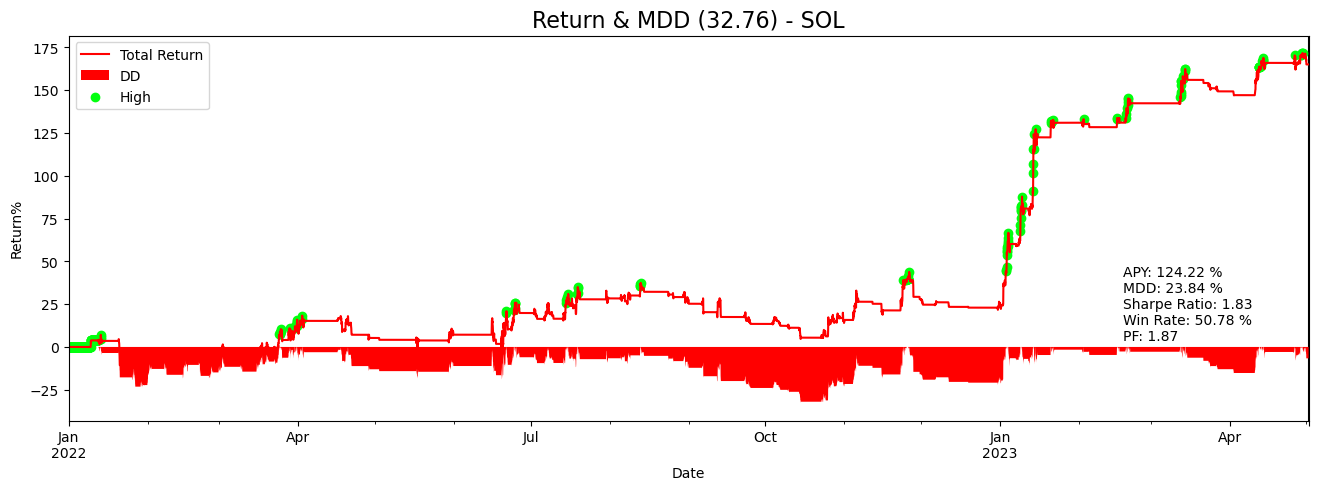

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |     14.63 |  5857.5  | -4708.17 |       1.24 |   53.33 |         30 |
| 2022-06    |      8.34 |  4906.59 | -4072.16 |       1.2  |   50    |         20 |
| 2022-09    |     -6.37 |  3181.59 | -3818.67 |       0.83 |   46.43 |         28 |
| 2022-12    |     10.75 |  4805.74 | -3730.79 |       1.29 |   43.48 |         23 |
| 2023-03    |    125.11 | 14281    | -1770.53 |       8.07 |   60    |         20 |
| 2023-06    |     15.73 |  2442.21 |  -868.89 |       2.81 |   57.14 |          7 |
+------------+-----------+----------+----------+------------+---------+------------+
======================= XRP LONG Optimize Test =======================
Optimization trails: 2352


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   45.0s
[Parallel(n_jobs=-1)]: Done 2352 out of 2352 | elapsed:   54.5s finished


Optimization time: 54.57 sec
---------- XRP LONG ----------
{'short_window_l': 56, 'middle_window_l': 24, 'long_window_l': 20, 'short_window_s': 20, 'middle_window_s': 50, 'long_window_s': 120}
APY: 43.88 %
MDD: 27.31 %
MDD Duration 220 days 17:00:00
worst trade: -6.14 %
2022-09-30 14:00:00 ~ 2022-10-02 22:00:00
avg holding days: 2.15 days
--------------------------------------------
PF: 1.86
Sharpe Ratio: 1.13
Calmar Ratio: 1.51
Sortino Ratio: 1.69
Omega Ratio: 1.08
--------------------------------------------
Expectancy : 1.02 %
Total Time Exposure : 25.21 %
Total Trades: 57
Win Rate: 40.35 %
--------------------------------------------
PF * Win Rate: 0.752


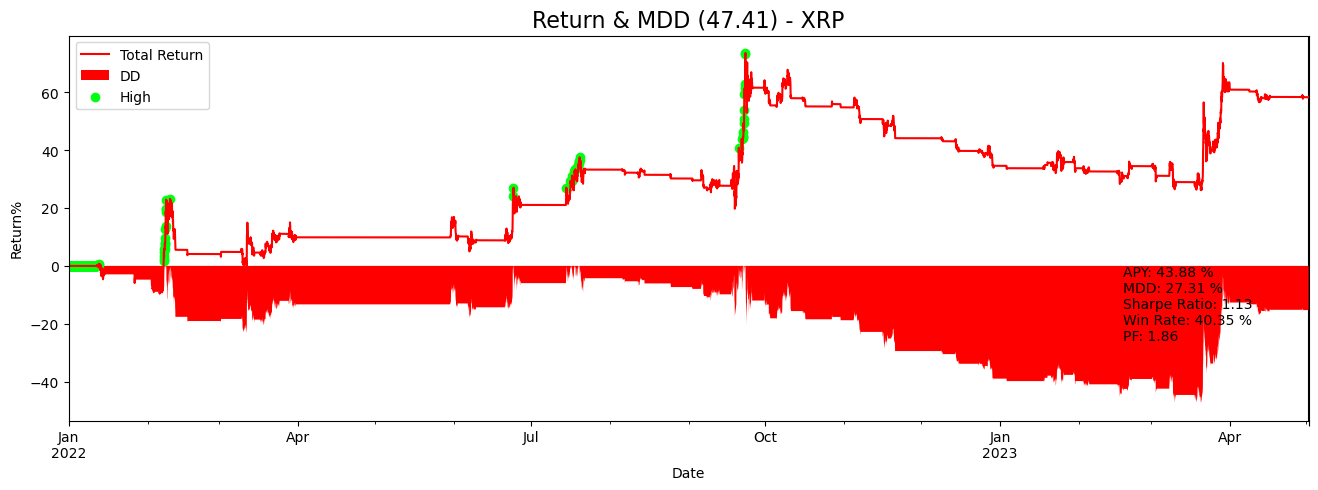

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     10.89 | 2389.52 | -1402.07 |       1.7  |   36.36 |         11 |
| 2022-06    |     11.2  | 1325.47 |  -205.06 |       6.46 |   75    |          4 |
| 2022-09    |     34.4  | 4750.07 | -1310.54 |       3.62 |   38.46 |         13 |
| 2022-12    |    -20.86 |  331.48 | -2417.61 |       0.14 |   18.18 |         11 |
| 2023-03    |     26.32 | 3752.69 | -1121.05 |       3.35 |   57.14 |         14 |
| 2023-06    |     -2.62 |   42.11 |  -303.97 |       0.14 |   25    |          4 |
+------------+-----------+---------+----------+------------+---------+------------+
-------------------1h is done----------------------
======================= SOL SHORT Optimize Test =======================
Optimization trails: 2352


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 2352 out of 2352 | elapsed:  1.0min finished


Optimization time: 62.18 sec
---------- SOL SHORT ----------
{'short_window_l': 20, 'middle_window_l': 50, 'long_window_l': 120, 'short_window_s': 32, 'middle_window_s': 28, 'long_window_s': 4}
APY: 142.33 %
MDD: 9.80 %
MDD Duration 173 days 02:00:00
worst trade: -6.21 %
2023-01-31 06:00:00 ~ 2023-02-02 03:00:00
avg holding days: 1.57 days
--------------------------------------------
PF: 9.05
Sharpe Ratio: 3.07
Calmar Ratio: 12.45
Sortino Ratio: 5.10
Omega Ratio: 1.31
--------------------------------------------
Expectancy : 3.92 %
Total Time Exposure : 15.82 %
Total Trades: 49
Win Rate: 68.75 %
--------------------------------------------
PF * Win Rate: 6.221


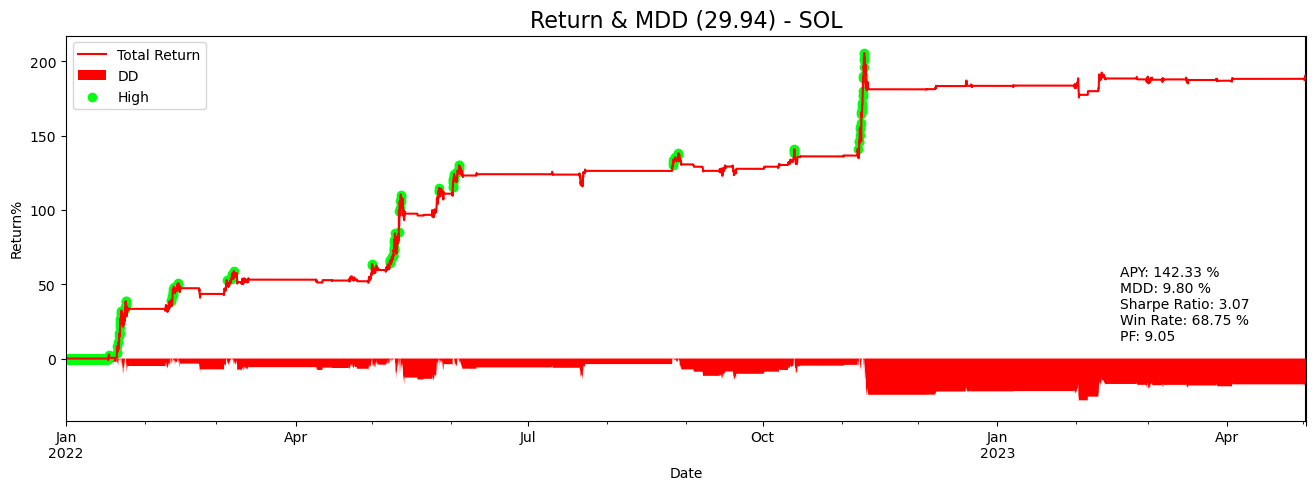

+------------+-----------+---------+---------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |    毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+---------+------------+---------+------------|
| 2022-03    |     53.06 | 5688.71 | -383.01 |      14.85 |   85.71 |          7 |
| 2022-06    |     70.94 | 7556.56 | -462.6  |      16.33 |   66.67 |         12 |
| 2022-09    |      3.64 |  976.8  | -613    |       1.59 |   50    |          8 |
| 2022-12    |     55.79 | 5579.4  |   -0.19 |   29129.3  |   90    |         10 |
| 2023-03    |      3.41 | 1219.31 | -878.41 |       1.39 |   50    |         10 |
| 2023-06    |      2.28 |  228.49 |    0    |     inf    |  100    |          2 |
+------------+-----------+---------+---------+------------+---------+------------+
======================= XRP SHORT Optimize Test =======================
Optimization trails: 2352


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   47.0s


In [2]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['ADA']
sample_sets = [[start,end]]
# freq = '1h'


for direction in ['long','short']:
    if direction == 'long':
        params={"short_window_l": [12,60,4],
                "middle_window_l": [4,60,4],
                "long_window_l": [4,60,4],
                "short_window_s": [20,30,10],
                "middle_window_s": [50,60,10],
                "long_window_s": [120,130,10]}
    else:
        params={"short_window_l": [20,30,10],
                "middle_window_l": [50,60,10],
                "long_window_l": [120,130,10],
                "short_window_s": [12,60,4],
                "middle_window_s": [4,60,4],
                "long_window_s": [4,60,4]}
    
    config = {'freq':'1h','fee': 0.0003}
    multi_test = MultiTester(
        Strategy,
        get_data_func=get_data,
        params=params,
        config=config,
        symbol_list=symbol_list,
        start=start,
        end=end
        )

    all_params = multi_test.multi_params(symbol_list,sample_sets,direction=direction)
    trades, value_df = multi_test.multi_params_result(all_params)
    print(f'-------------------1h is done----------------------')
